In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

#loading data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Fill missing values in the 'Age' column with the median age
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].median())

# Fill missing 'Embarked' with mode
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])

# Fill missing 'Fare' in test dataset with median
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].median())

# convert text values ​​to numeric values
label_encoder = LabelEncoder()
train_df['Sex'] = label_encoder.fit_transform(train_df['Sex'])
test_df['Sex'] = label_encoder.fit_transform(test_df['Sex'])

# Create 'Family' feature
train_df['Family'] = train_df['SibSp'] + train_df['Parch']
test_df['Family'] = test_df['SibSp'] + test_df['Parch']

# Create 'IsAlone' feature
train_df['IsAlone'] = (train_df['Family'] == 0). astype(int)
test_df['IsAlone'] = (test_df['Family'] == 0).astype(int)

# Encode 'Embarked' column
train_df['Embarked'] = label_encoder.fit_transform(train_df['Embarked'])
test_df['Embarked'] = label_encoder.fit_transform(test_df['Embarked'])



In [14]:
# Features and target
X = train_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Survived'], axis = 1)
y = train_df['Survived']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [15]:
# Initialize models
rf = RandomForestClassifier(random_state = 42)

# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [200],
    'max_depth': [10, 15, 20, 30],
    'min_samples_split': [5, 10, 25]
}

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5, scoring = 'accuracy')
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Model evaluation
y_pred = best_model.predict(X_val)
print('Accuracy:', accuracy_score(y_val, y_pred))
print('Classification Report:\n', classification_report(y_val, y_pred))

Accuracy: 0.8435754189944135
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87       105
           1       0.86      0.74      0.80        74

    accuracy                           0.84       179
   macro avg       0.85      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



In [16]:
best_model

RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=200,
                       random_state=42)

<ipython-input-17-d28b7fd9b177>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=feature_importances.index, x=feature_importances, palette="Accent")


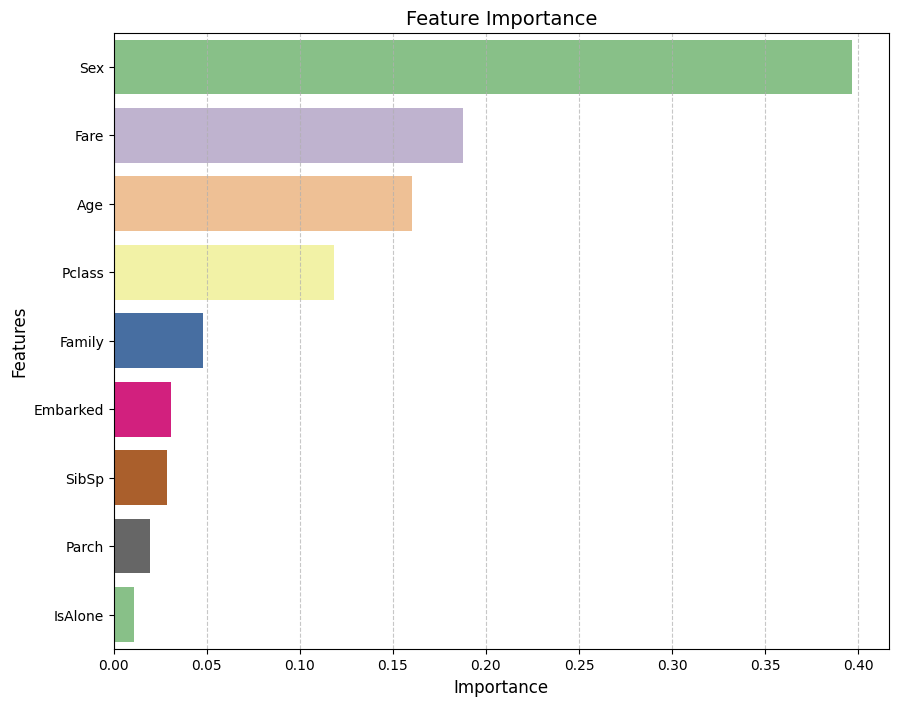

In [17]:
# Feature importance vizualization
feature_importances = pd.Series(best_model.feature_importances_, index = X.columns)
feature_importances = feature_importances.sort_values(ascending = False)

plt.figure(figsize=(10, 8))
sns.barplot(y=feature_importances.index, x=feature_importances, palette="Accent")
plt.title('Feature Importance', fontsize=14)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [18]:
# Prepare test data
test_features = test_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1)

# Predictions
test_df['Survived'] = best_model.predict(test_features)

# Submission file
submission = test_df[['PassengerId', 'Survived']]
submission.to_csv('submission_randomforest.csv', index=False)